In [1]:
import gc
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
%%time
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')

Wall time: 26.1 s


In [3]:
train['isFraud'].value_counts().values

array([569877,  20663], dtype=int64)

In [4]:
train['isFraud'].index

RangeIndex(start=0, stop=590540, step=1)

# Fruad vs Not Fruad

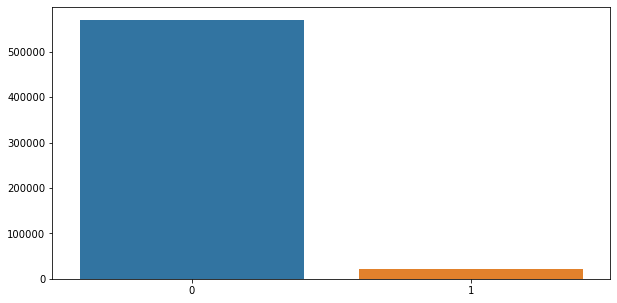

In [5]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
sns.barplot([0,1],train['isFraud'].value_counts().values)
plt.show()

In [6]:
train['TransactionDT'].describe()

count    5.905400e+05
mean     7.372311e+06
std      4.617224e+06
min      8.640000e+04
25%      3.027058e+06
50%      7.306528e+06
75%      1.124662e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64

### Since we know transationDT is in sec we can create 2 new features from this.
1. hour 
2. day

In [10]:
train['day'] = (train['TransactionDT']//(3600*24)-1)%7 # Per 7 days
test['day'] = (test['TransactionDT']//(3600*24)-1)%7 # Per 7 days
train['day'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

# Transaction per day

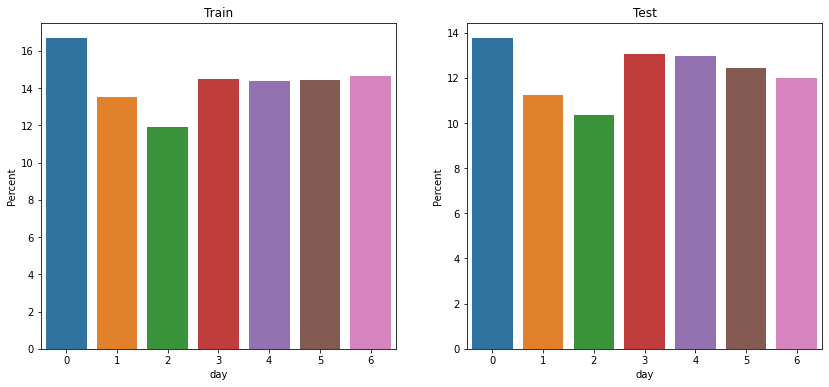

In [16]:
# For train
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
percentage = lambda i: len(i) / float(len(train['day'])) * 100
ax = sns.barplot(x=train['day'], y=train['day'],  estimator=percentage)
ax.set(ylabel="Percent")
plt.title('Train')

# For test
plt.subplot(1,2,2)
percentage = lambda i: len(i) / float(len(train['day'])) * 100
ax = sns.barplot(x=test['day'], y=test['day'],  estimator=percentage)
ax.set(ylabel="Percent")
plt.title('Test')
plt.show()

In [32]:
chck = train.groupby(['isFraud'])['day']

chck.value_counts()

isFraud  day
0        0      94952
         6      83166
         3      82746
         5      82410
         4      82012
         1      76871
         2      67720
1        0       3550
         6       3211
         1       2963
         5       2946
         4       2803
         3       2687
         2       2503
Name: day, dtype: int64

# Transaction per Hour

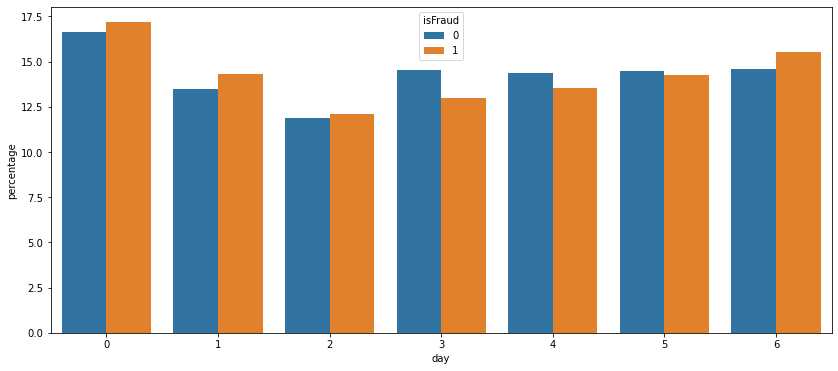

In [55]:
train_day = (train.groupby(['isFraud'])['day']
             .value_counts(normalize=True)
             .rename('percentage')
             .mul(100) # After normalization percentage gets too low. So we multiply it with 100
             .reset_index())

plt.figure(figsize=(14,6))
sns.barplot(x="day", y="percentage", hue="isFraud", data=train_day)
plt.show()

In [56]:
train['hour'] = (train['TransactionDT']//(3600))%24
test['hour'] = (test['TransactionDT']//(3600))%24

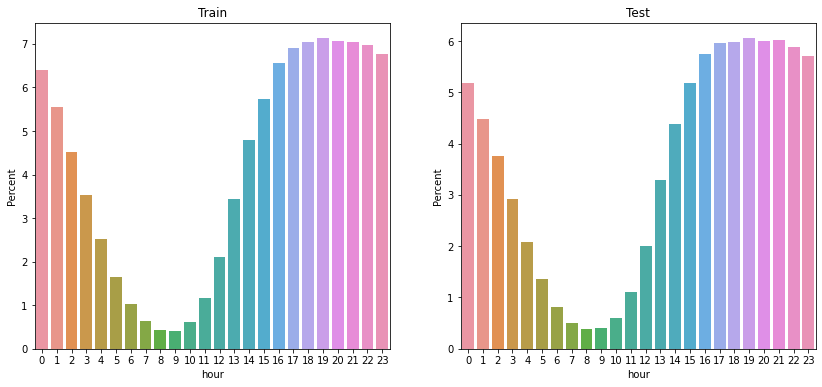

In [59]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
percentage = lambda i: len(i) / float(len(train['hour'])) * 100
ax = sns.barplot(x=train['hour'], y=train['hour'],  estimator=percentage)
ax.set(ylabel="Percent")
plt.title('Train')

plt.subplot(1,2,2)
percentage = lambda i: len(i) / float(len(train['day'])) * 100
ax = sns.barplot(x=test['hour'], y=test['hour'],  estimator=percentage)
ax.set(ylabel="Percent")
plt.title('Test')
plt.show()

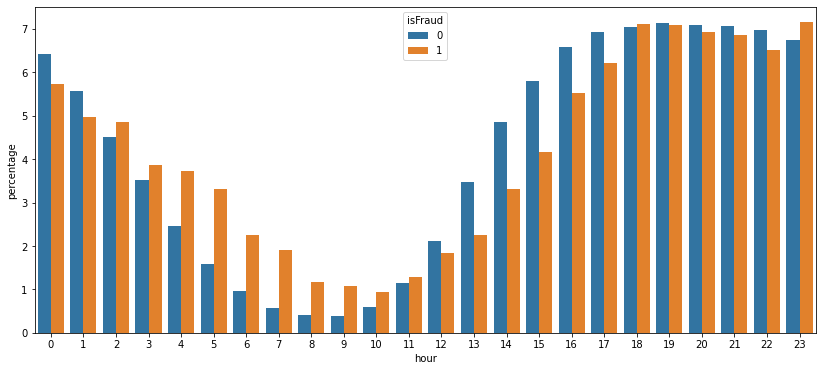

In [60]:
train_hour = (train.groupby(['isFraud'])['hour']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())

plt.figure(figsize=(14,6))
sns.barplot(x="hour", y="percentage", hue="isFraud", data=train_hour)
plt.show()

## Adding new feature(Alert)

In [61]:
def hourFeature(hour):
    if hour>1 and hour < 12:
        return "highalert"
    if hour >=12 or hour==18:
        return "lowalert"
    if hour==2 or hour==3 or hour==23:
        return "mediumalert"
    else:
        return "noalert"

In [62]:
train['alertFeature'] = train['hour'].apply(hourFeature)
test['alertFeature'] = test['hour'].apply(hourFeature)

In [63]:
print(train.shape)
print(test.shape)

(590540, 186)
(506691, 185)


In [64]:
train.to_csv('./dataset/train.csv')
test.to_csv('./dataset/test.csv')